<a href="https://colab.research.google.com/github/rtajeong/M3_new/blob/main/M3_lab34_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# nonlinear Classification

# KNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
iris = load_iris()

In [ ]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
X, y = iris.data, iris.target

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

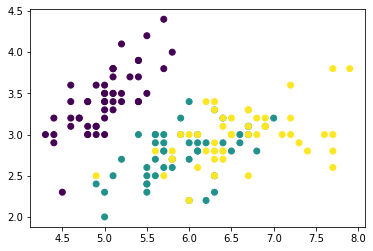

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# for testing data split in knn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.96

In [ ]:
X_train.shape, X_test.shape

((75, 4), (75, 4))

In [ ]:
clf1 = SGDClassifier()
clf2 = KNeighborsClassifier(n_neighbors=9)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
print(clf1.score(X_test, y_test), clf2.score(X_test, y_test))

0.8133333333333334 0.9733333333333334


In [ ]:
for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  print("k is :", i, "---", knn.score(X_test, y_test))

k is : 1 --- 0.9733333333333334
k is : 2 --- 0.96
k is : 3 --- 0.96
k is : 4 --- 0.9466666666666667
k is : 5 --- 0.96
k is : 6 --- 0.96
k is : 7 --- 0.9733333333333334
k is : 8 --- 0.96
k is : 9 --- 0.9733333333333334


In [ ]:
clf1.coef_, clf1.intercept_

(array([[   7.87401575,   36.74540682,  -41.33858268,  -17.71653543],
        [  56.41911341, -140.18422568,   -2.30282096, -100.17271157],
        [-114.99493414, -105.87639311,  167.17325228,  144.88348531]]),
 array([  9.97034658, 138.75471277, -94.37113184]))

In [ ]:
pred = clf2.predict(X_test)
pred

array([2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 2, 1,
       2, 2, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2,
       2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1])

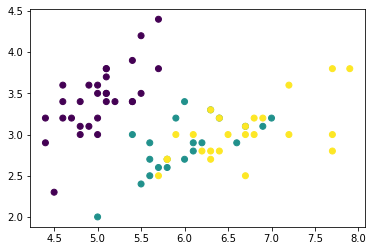

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

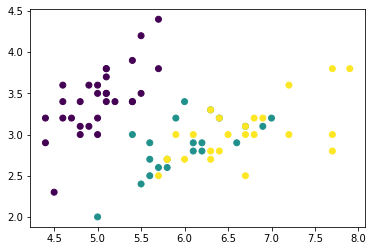

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c=pred)

# K-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
knn = KNeighborsClassifier(n_neighbors=5)
cval = cross_val_score(knn, X, y, cv=5)
cval, cval.mean()

(array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 0.9733333333333334)

In [ ]:
# linear model (non-scaled)
clf = SGDClassifier()
cval = cross_val_score(clf, X, y, cv=5)
cval, cval.mean()

(array([0.66666667, 0.66666667, 0.93333333, 0.86666667, 0.96666667]), 0.82)

In [ ]:
# linear model (scaled)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

clf = SGDClassifier()
cval = cross_val_score(clf, X_scaled, y, cv=5)
cval, cval.mean()

(array([0.8       , 1.        , 0.93333333, 0.9       , 1.        ]),
 0.9266666666666665)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
cval = cross_val_score(knn, X_scaled, y, cv=5)
cval, cval.mean()

(array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]), 0.96)

# Decision Tree 

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9555555555555556


In [ ]:
clf.feature_importances_

array([0.0261976 , 0.        , 0.06619482, 0.90760758])

[Text(0.4, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [34, 36, 35]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.7\ngini = 0.5\nsamples = 71\nvalue = [0, 36, 35]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.145\nsamples = 38\nvalue = [0, 35, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= 6.15\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(0.7, 0.4166666666666667, 'X[0] <= 5.95\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]

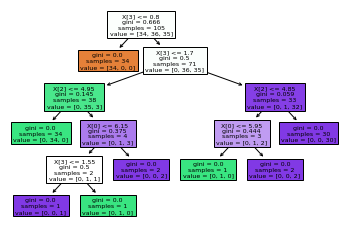

In [ ]:
# decision tree graph
tree.plot_tree(clf, filled=True)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
export_graphviz(
    clf,
    out_file='./iris.dot',
    feature_names = iris.feature_names,
    class_names = iris.target_names,
    filled = True
    )

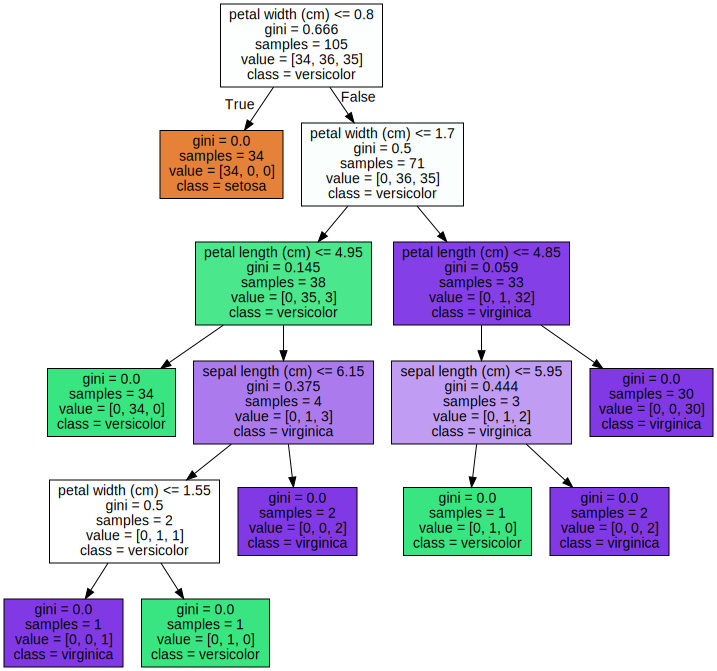

In [ ]:
with open("./iris.dot") as f:
  dot_graph = str(open("./iris.dot", "rb").read(), "utf8")
graphviz.Source(dot_graph)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)


0.9777777777777777

In [ ]:
rfc.feature_importances_

array([0.08686294, 0.02937396, 0.42296246, 0.46080064])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gbc = GradientBoostingClassifier(n_estimators = 200)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

1.0

In [ ]:
gbc.feature_importances_

array([0.00265302, 0.02182805, 0.64741931, 0.32809962])

# with little bigger dataset

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9181286549707602

In [ ]:
X.shape, y.shape

((569, 30), (569,))

In [ ]:
clf.feature_importances_

array([0.        , 0.02815605, 0.        , 0.        , 0.        ,
       0.        , 0.01229567, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0025403 , 0.        ,
       0.00873096, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03587871, 0.        , 0.72864076, 0.01911512,
       0.02500383, 0.        , 0.12186507, 0.01054078, 0.00723275])

In [ ]:
# cancer.feature_names
df = pd.DataFrame(list(zip(cancer.feature_names, clf.feature_importances_)))

In [ ]:
df.columns = ['feature', 'importance']

In [ ]:
df = df.sort_values(by='importance', ascending=False)

In [ ]:
df.head()

,feature,importance
23,worst area,0.728641
27,worst concave points,0.121865
21,worst texture,0.035879
1,mean texture,0.028156
25,worst compactness,0.025004


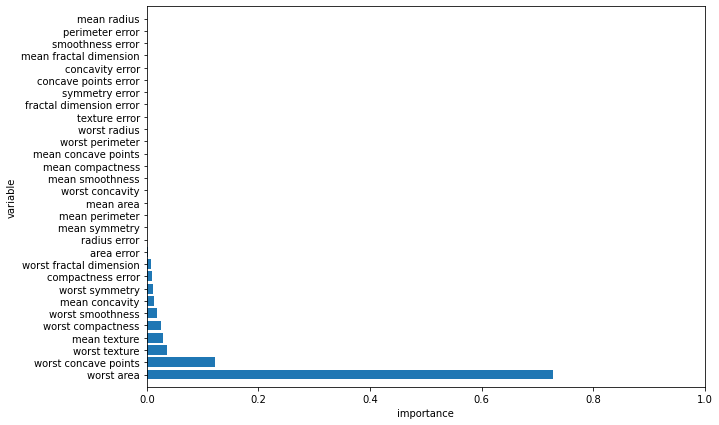

In [ ]:
x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('importance')
plt.ylabel('variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

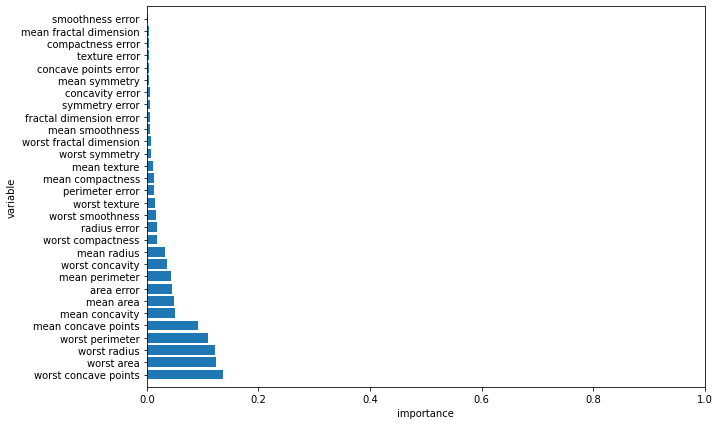

In [ ]:
# randomforest
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)
df = pd.DataFrame(list(zip(cancer.feature_names, rfc.feature_importances_)))
df.columns = ['feature', 'importance']
df = df.sort_values(by='importance', ascending=False)

x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('importance')
plt.ylabel('variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

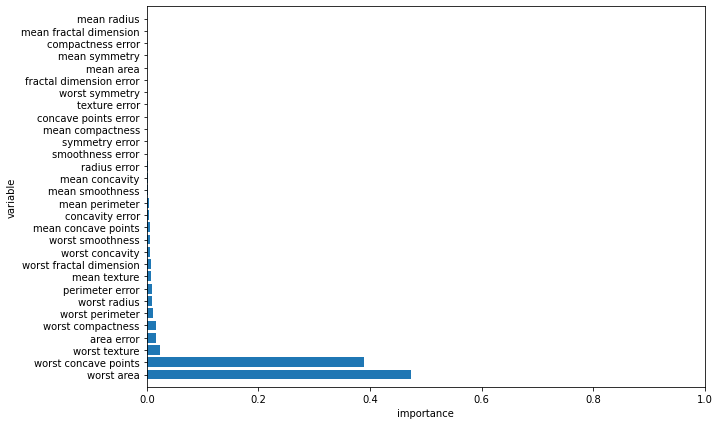

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=1000)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

df = pd.DataFrame(list(zip(cancer.feature_names, gbc.feature_importances_)))
df.columns = ['feature', 'importance']
df = df.sort_values(by='importance', ascending=False)

x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('importance')
plt.ylabel('variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()